# PA 3: Association Analysis - Apriori/FP Growth

## Tasks

1.    Load the dataset (from the csv file)

In [1]:
# Write your code here
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules as fpgrowth_association_rules

In [2]:
purchases = pd.read_csv('dataset3.csv')
print(purchases.shape)

(999, 17)


In [3]:
purchases.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


2.    Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [4]:
# # Write your code here
# check for null values
print(purchases.isnull().sum())

# remove rows with missing values
purchases.dropna(inplace=True)

Unnamed: 0      0
Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64


In [5]:
print(purchases.shape)

(999, 17)


In [6]:
# check for empty strings

# Check for and handle null values
if purchases.isnull().sum().sum() > 0:
    # If there are any null values, fill them with a default value or remove the rows/columns containing nulls
    purchases.fillna(value='default', inplace=True) # or df.dropna(inplace=True)

# Check for and handle empty strings
if (purchases == '').sum().sum() > 0:
    # If there are any empty strings, fill them with a default value or remove the rows/columns containing empty strings
    purchases.replace('', 'default', inplace=True) # or df.dropna(inplace=True)


# remove trailing spaces and commas
purchases = purchases.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
purchases = purchases.apply(lambda x: x.str.rstrip(",") if x.dtype == "object" else x)

In [7]:
# check the pre-processed dataset
print(purchases.head())
print(purchases.shape)

   Unnamed: 0  Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Ice cream  \
0           0  False   True   False   False   True   True  False       True   
1           1  False  False   False   False  False  False  False      False   
2           2   True  False    True   False  False   True  False       True   
3           3  False  False    True    True  False   True  False      False   
4           4   True   True   False   False  False  False  False      False   

   Kidney Beans   Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  chocolate  
0         False  False   False  False   True    False    True       True  
1         False   True   False  False  False    False   False      False  
2         False   True   False  False  False    False    True       True  
3         False   True    True   True  False    False   False      False  
4         False  False   False  False  False    False   False      False  
(999, 17)


In [8]:
# Drop the unnamed column from the data
purchases.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
purchases.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Explanation of the pre-processing steps

#### First me remove all the rows with missing data / NA values.
#### purchases.isnull().sum().sum() and (purchases == '').sum().sum() are used to check the nan and empty values in the entire dataset respectively.
#### purchases.applymap(lambda x: x.strip() if type(x) == str else x) is used to remove all the extra spaces and trailing characters that are unnecessary.
#### purchases.drop(columns=['Unnamed: 0'], inplace=True is used to remove the unnamed column from the dataset

3.    Encode the dataset

In [10]:
# Encode the dataset where all the boolean values are converted to integer 0 and 1.
# In this case 0 represents false and 1 represents true
purchases_encoded =purchases.astype(int)
purchases_encoded.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1
3,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


For each of the combinations in tasks 4 & 5, print the output in the following Sample format: 

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [11]:
# Define the minimum support and confidence values
min_support1 = 0.02
min_confidence1 = 0.1

# Apply the apriori algorithm with the current minimum support value
frequent_itemsets1 = apriori(purchases_encoded.astype('bool'), min_support=min_support1, use_colnames=True)
print(frequent_itemsets1.head())
# Generate association rules with the current minimum confidence value
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=min_confidence1)
print(rules1.head())

# Print the requested information
print("Support:", min_support1)
print("Confidence:", min_confidence1)
print("Number of frequent itemsets:", frequent_itemsets1.shape[0])
print("Number of association rules:", rules1.shape[0])
print("Top 5 rules ordered by confidence:")
print(rules1[['antecedents', 'consequents', 'support', 'confidence']].sort_values(by='confidence', ascending=False).head())
print("Number of maximal sets:", len(rules1[rules1['antecedent support'] == rules1['consequent support']]))
print("Number of closed sets:", len(rules1[rules1['support'] == rules1['antecedent support']]))

    support  itemsets
0  0.383383   (Apple)
1  0.384384   (Bread)
2  0.420420  (Butter)
3  0.404404  (Cheese)
4  0.407407    (Corn)
  antecedents consequents  antecedent support  consequent support   support  \
0     (Bread)     (Apple)            0.384384            0.383383  0.154154   
1     (Apple)     (Bread)            0.383383            0.384384  0.154154   
2    (Butter)     (Apple)            0.420420            0.383383  0.188188   
3     (Apple)    (Butter)            0.383383            0.420420  0.188188   
4    (Cheese)     (Apple)            0.404404            0.383383  0.162162   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.401042  1.046059  0.006788    1.029482       0.071524  
1    0.402089  1.046059  0.006788    1.029610       0.071407  
2    0.447619  1.167549  0.027006    1.116289       0.247602  
3    0.490862  1.167549  0.027006    1.138354       0.232730  
4    0.400990  1.045925  0.007120    1.029393       0.073721  
Support: 0.02
C

In [12]:
# Define the minimum support and confidence values
min_support2 = 0.03
min_confidence2 = 0.2

# Apply the apriori algorithm with the current minimum support value
frequent_itemsets2 = apriori(purchases_encoded.astype('bool'), min_support=min_support2, use_colnames=True)

# Generate association rules with the current minimum confidence value
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=min_confidence2)

# Print the requested information
print("Minimum support:", min_support2)
print("Minimum confidence:", min_confidence2)
print("Number of frequent itemsets:", frequent_itemsets2.shape[0])
print("Number of association rules:", rules2.shape[0])
print("Top 5 rules ordered by confidence:")
print(rules2[['antecedents', 'consequents', 'support', 'confidence']].sort_values(by='confidence', ascending=False).head())
print("Number of maximal sets:", len(rules2[rules2['antecedent support'] == rules2['consequent support']]))
print("Number of closed sets:", len(rules2[rules2['support'] == rules2['antecedent support']]))

Minimum support: 0.03
Minimum confidence: 0.2
Number of frequent itemsets: 2617
Number of association rules: 22111
Top 5 rules ordered by confidence:
                           antecedents     consequents   support  confidence
20686  (Unicorn, Sugar, Nutmeg, Apple)          (Corn)  0.031031    0.794872
20924      (Bread, Corn, Nutmeg, Milk)  (Kidney Beans)  0.033033    0.785714
20548       (Onion, Corn, Eggs, Apple)         (Sugar)  0.031031    0.775000
20566    (Eggs, Unicorn, Sugar, Apple)          (Corn)  0.030030    0.769231
20833      (Bread, Corn, Butter, Milk)  (Kidney Beans)  0.032032    0.744186
Number of maximal sets: 244
Number of closed sets: 0


In [13]:
# Define the minimum support and confidence values
min_support3 = 0.05
min_confidence3 = 0.5

# Apply the apriori algorithm with the current minimum support value
frequent_itemsets3 = apriori(purchases_encoded.astype('bool'), min_support=min_support3, use_colnames=True)

# Generate association rules with the current minimum confidence value
rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=min_confidence3)

# Print the requested information
print("Minimum support:", min_support3)
print("Minimum confidence:", min_confidence3)
print("Number of frequent itemsets:", frequent_itemsets3.shape[0])
print("Number of association rules:", rules3.shape[0])
print("Top 5 rules ordered by confidence:")
print(rules3[['antecedents', 'consequents', 'support', 'confidence']].sort_values(by='confidence', ascending=False).head())
print("Number of maximal sets:", len(rules3[rules3['antecedent support'] == rules3['consequent support']]))
print("Number of closed sets:", len(rules3[rules3['support'] == rules3['antecedent support']]))

Minimum support: 0.05
Minimum confidence: 0.5
Number of frequent itemsets: 947
Number of association rules: 1494
Top 5 rules ordered by confidence:
                      antecedents     consequents   support  confidence
1361        (Unicorn, Dill, Milk)     (chocolate)  0.062062    0.681319
1200     (Unicorn, Sugar, Cheese)  (Kidney Beans)  0.054054    0.666667
1158  (Cheese, Yogurt, Ice cream)  (Kidney Beans)  0.057057    0.655172
1120         (Cheese, Dill, Milk)     (chocolate)  0.055055    0.654762
645          (Onion, Corn, Apple)         (Sugar)  0.054054    0.650602
Number of maximal sets: 0
Number of closed sets: 0


5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [14]:
# Define the minimum support and confidence values
min_support1 = 0.02
min_confidence1 = 0.1

# Apply the FP Growth algorithm with the current minimum support value
frequent_itemsets1 = fpgrowth(purchases_encoded.astype('bool'), min_support=min_support1, use_colnames=True)
print(frequent_itemsets1.head())
# Generate association rules with the current minimum confidence value
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=min_confidence1)
print(rules1.head())

# Print the requested information
print("Support:", min_support1)
print("Confidence:", min_confidence1)
print("Number of frequent itemsets:", frequent_itemsets1.shape[0])
print("Number of association rules:", rules1.shape[0])
print("Top 5 rules ordered by confidence:")
print(rules1[['antecedents', 'consequents', 'support', 'confidence']].sort_values(by='confidence', ascending=False).head())
print("Number of maximal sets:", len(rules1[rules1['antecedent support'] == rules1['consequent support']]))
print("Number of closed sets:", len(rules1[rules1['support'] == rules1['antecedent support']]))

    support     itemsets
0  0.421421  (chocolate)
1  0.420420     (Yogurt)
2  0.410410  (Ice cream)
3  0.409409      (Sugar)
4  0.407407       (Corn)
   antecedents  consequents  antecedent support  consequent support   support  \
0  (chocolate)     (Yogurt)            0.421421            0.420420  0.198198   
1     (Yogurt)  (chocolate)            0.420420            0.421421  0.198198   
2  (chocolate)  (Ice cream)            0.421421            0.410410  0.202202   
3  (Ice cream)  (chocolate)            0.410410            0.421421  0.202202   
4     (Yogurt)  (Ice cream)            0.420420            0.410410  0.182182   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.470309  1.118663  0.021024    1.094184       0.183339  
1    0.471429  1.118663  0.021024    1.094608       0.183022  
2    0.479810  1.169098  0.029246    1.133412       0.249991  
3    0.492683  1.169098  0.029246    1.140467       0.245323  
4    0.433333  1.055854  0.009637    1.040452   

In [15]:
# Define the minimum support and confidence values
min_support2 = 0.03
min_confidence2 = 0.2

# Apply the FP Growth algorithm with the current minimum support value
frequent_itemsets2 = fpgrowth(purchases_encoded.astype('bool'), min_support=min_support2, use_colnames=True)

# Generate association rules with the current minimum confidence value
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=min_confidence2)

# Print the requested information
print("Support:", min_support2)
print("Confidence:", min_confidence2)
print("Number of frequent itemsets:", frequent_itemsets2.shape[0])
print("Number of association rules:", rules2.shape[0])
print("Top 5 rules ordered by confidence:")
print(rules2[['antecedents', 'consequents', 'support', 'confidence']].sort_values(by='confidence', ascending=False).head())
print("Number of maximal sets:", len(rules2[rules2['antecedent support'] == rules2['consequent support']]))
print("Number of closed sets:", len(rules2[rules2['support'] == rules2['antecedent support']]))

Support: 0.03
Confidence: 0.2
Number of frequent itemsets: 2617
Number of association rules: 22111
Top 5 rules ordered by confidence:
                           antecedents     consequents   support  confidence
9520   (Unicorn, Sugar, Nutmeg, Apple)          (Corn)  0.031031    0.794872
5167       (Bread, Corn, Nutmeg, Milk)  (Kidney Beans)  0.033033    0.785714
11047       (Onion, Corn, Eggs, Apple)         (Sugar)  0.031031    0.775000
11296    (Eggs, Unicorn, Sugar, Apple)          (Corn)  0.030030    0.769231
5445       (Bread, Corn, Butter, Milk)  (Kidney Beans)  0.032032    0.744186
Number of maximal sets: 244
Number of closed sets: 0


In [16]:
# Define the minimum support and confidence values
min_support3 = 0.04
min_confidence3 = 0.4

# Apply the FP Growth algorithm with the current minimum support value
frequent_itemsets3 = fpgrowth(purchases_encoded.astype('bool'), min_support=min_support3, use_colnames=True)

# Generate association rules with the current minimum confidence value
rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=min_confidence3)

# Print the requested information
print("Support:", min_support3)
print("Confidence:", min_confidence3)
print("Number of frequent itemsets:", frequent_itemsets3.shape[0])
print("Number of association rules:", rules3.shape[0])
print("Top 5 rules ordered by confidence:")
print(rules3[['antecedents', 'consequents', 'support', 'confidence']].sort_values(by='confidence', ascending=False).head())
print("Number of maximal sets:", len(rules3[rules3['antecedent support'] == rules3['consequent support']]))
print("Number of closed sets:", len(rules3[rules3['support'] == rules3['antecedent support']]))

Support: 0.04
Confidence: 0.4
Number of frequent itemsets: 2058
Number of association rules: 7339
Top 5 rules ordered by confidence:
                   antecedents     consequents   support  confidence
5654     (Unicorn, Dill, Milk)     (chocolate)  0.062062    0.681319
3605    (Eggs, Unicorn, Apple)          (Corn)  0.046046    0.676471
5506  (Unicorn, Sugar, Cheese)  (Kidney Beans)  0.054054    0.666667
1965       (Bread, Eggs, Dill)        (Yogurt)  0.045045    0.661765
5819   (Unicorn, Nutmeg, Dill)     (chocolate)  0.046046    0.657143
Number of maximal sets: 4
Number of closed sets: 0


6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

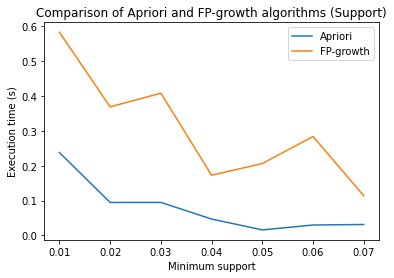

In [17]:
# Write your code here
# Set minimum support range
min_sup_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]

# Initialize lists to store results
apriori_times = []
fpgrowth_times = []
apriori_itemsets = []
fpgrowth_itemsets = []

# Loop through minimum support range and generate frequent itemsets for both algorithms
for min_sup in min_sup_range:
    # Apriori algorithm
    start_time = time.time()
    apriori_itemsets.append(apriori(purchases_encoded.astype('bool'), min_support=min_sup))
    apriori_times.append(time.time() - start_time)
    
    # FP-growth algorithm
    start_time = time.time()
    fpgrowth_itemsets.append(fpgrowth(purchases_encoded.astype('bool'), min_support=min_sup))
    fpgrowth_times.append(time.time() - start_time)

# Plot time vs. minimum support
plt.plot(min_sup_range, apriori_times, label='Apriori')
plt.plot(min_sup_range, fpgrowth_times, label='FP-growth')
plt.xlabel('Minimum support')
plt.ylabel('Execution time (s)')
plt.title('Comparison of Apriori and FP-growth algorithms (Support)')
plt.legend()
plt.show()

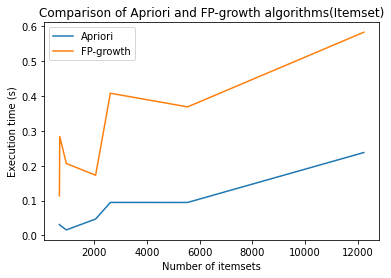

In [19]:
# Plot time vs. number of itemsets
apriori_num_itemsets = [len(itemsets) for itemsets in apriori_itemsets]
fpgrowth_num_itemsets = [len(itemsets) for itemsets in fpgrowth_itemsets]
plt.plot(apriori_num_itemsets, apriori_times, label='Apriori')
plt.plot(fpgrowth_num_itemsets, fpgrowth_times, label='FP-growth')
plt.xlabel('Number of itemsets')
plt.ylabel('Execution time (s)')
plt.title('Comparison of Apriori and FP-growth algorithms(Itemset)')
plt.legend()
plt.show()

7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

### Insights

##### The performance of Apriori and FP-growth algorithms can vary based on a number of criteria, including dataset size, data sparsity, minimum support threshold, and technology utilized to run the algorithms.

##### The FP-growth approach is often quicker than the Apriori technique, particularly for big and sparse datasets.

#### But in the above graphs, we can see that apriori performed better than the fp growth this can be because of the following reasons
##### 1. For smaller datasets, the Apriori method may be more efficient than the FP-growth algorithm since it takes fewer memory resources and can analyze smaller datasets quicker.
##### 2. The FP-growth technique may take longer to handle low-density datasets because it takes more time to generate and traverse the FP-tree. In contrast, the Apriori approach may be more efficient for sparse datasets.
##### 3. The efficiency of the algorithms can also depend on the computational resources available on the machine


# Rubric
* [02 points] - Student Details and complying with submission instructions 
* [03 points] - Task 1 
* [10 points] - Task 2
* [05 points] - Task 3
* [25 points] - Task 4
* [25 points] - Task 5
* [20 points] - task 6
* [10 points] - task 7

### References

#### https://datatofish.com/check-nan-pandas-dataframe/
#### https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c
#### https://www.kaggle.com/code/keitazoumana/comparative-analysis-between-apriori-and-fp-growth